In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [18]:
cust_df = pd.read_csv("bank_data.csv") #get the data
cust_df.head()

# CUSTID: Unique customer ID
# BALANCE: Balance left in customers' account
# BALANCE_FREQUENCY: Frequency of balance updation 
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one time
# INSTALLMENTS_PURCHASES: Amount of purchase done in installments
# CASH_ADVANCE: Advance cash given by the user
# PURCHASES_FREQUENCY: Frequency of purchases 
# ONEOFF_PURCHASES_FREQUENCY: Frequency of one time purchase 
# PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases
# CASH_ADVANCE_FREQUENCY: Frequency of payment of cash in advance
# CASH_ADVANCE_TRX: Number of "Cash in Advance" transactions
# PURCHASES_TRX: Number of purchase transactions
# CREDIT_LIMIT: Credit Card limit for the user
# PAYMENTS: Amount of payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payment done by user  
# PRC_FULL_PAYMENT: Percent of full payment done by user
# TENURE: Tenure of credit card service for user


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# print("Min Balance - %f\nAvg Balance - %f\nMax Balance - %f" 
#      %(cust_df.iloc[:,1].min(), cust_df.iloc[:,1].mean(), cust_df.iloc[:,1].max()))
cust_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
cust_df[cust_df['ONEOFF_PURCHASES'] == cust_df['ONEOFF_PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [5]:
cust_df[cust_df['CASH_ADVANCE'] == cust_df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


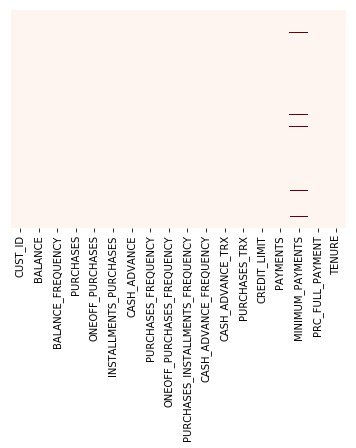

In [22]:
sns.heatmap(cust_df.isnull(), yticklabels = False, cbar = False, cmap = "Reds")

In [23]:
# count missing values for each colmun
# print(cust_df.isnull().sum()) 
# replace null values with avg 
cust_df.loc[cust_df['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS'] = cust_df['MINIMUM_PAYMENTS'].mean() 
cust_df.loc[cust_df['CREDIT_LIMIT'].isnull(), 'CREDIT_LIMIT'] = cust_df['CREDIT_LIMIT'].mean()
# check for duplicate rows
cust_df.duplicated().sum()

0

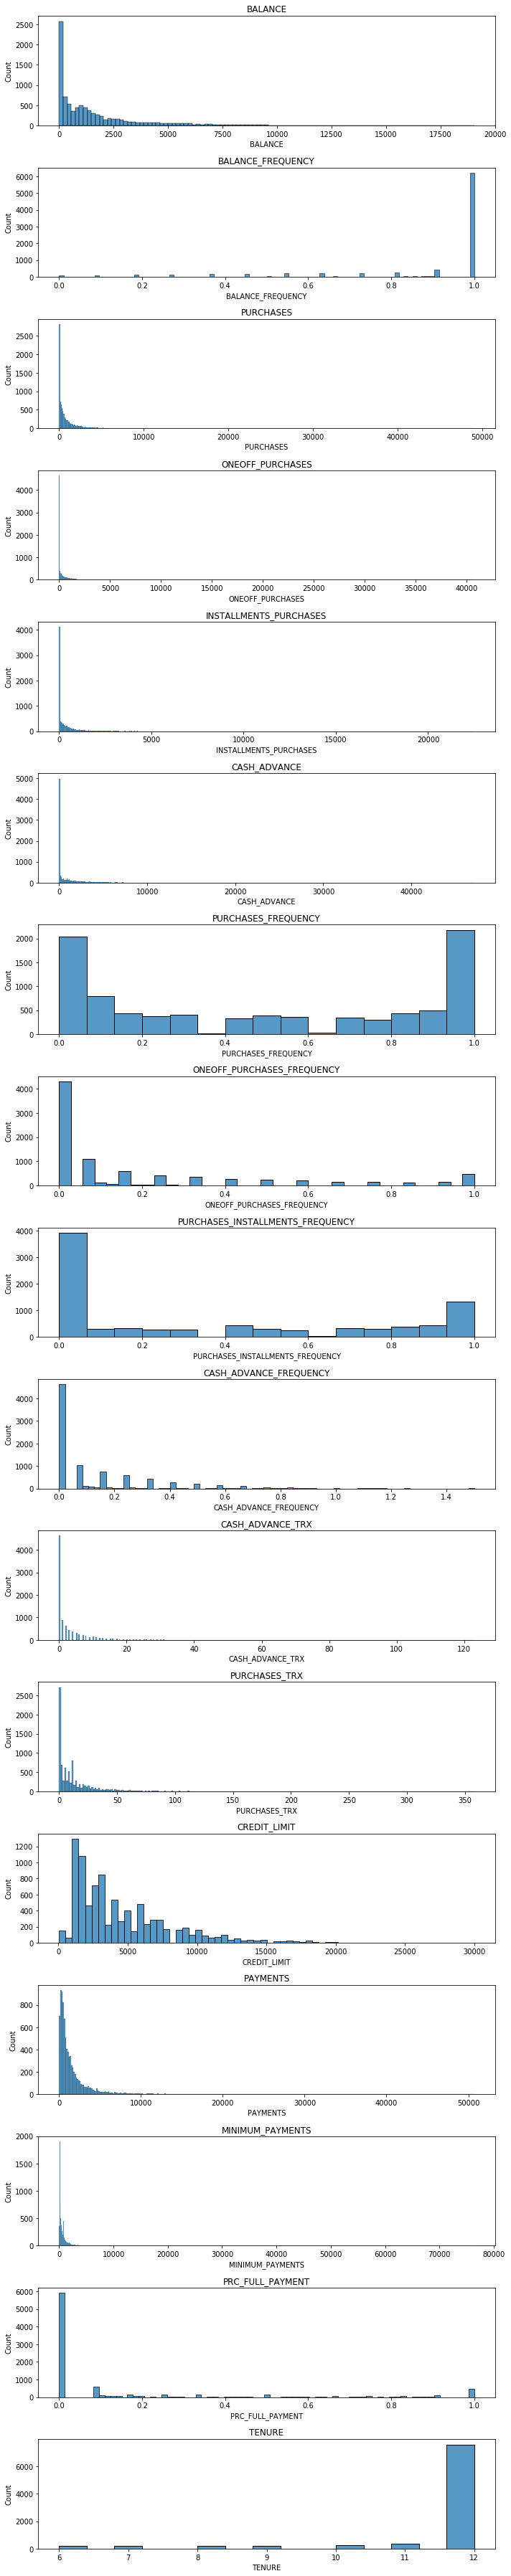

In [24]:
# plot the histograms
plt.figure(figsize=(10,50))
for i in range(1, len(cust_df.columns), 1):
    plt.subplot(17, 1, i)
    sns.histplot(cust_df[cust_df.columns[i]])
    plt.title(cust_df.columns[i])
plt.tight_layout()
# 'BALANCE_FREQUENCY' for most customers is updated frequently
# For 'PURCHASES_FREQUENCY', there are two distinct groups
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most customers 
# do not perform one time puchase or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'
# Credit limit average is around $4500
# Most customers are ~11 years tenure

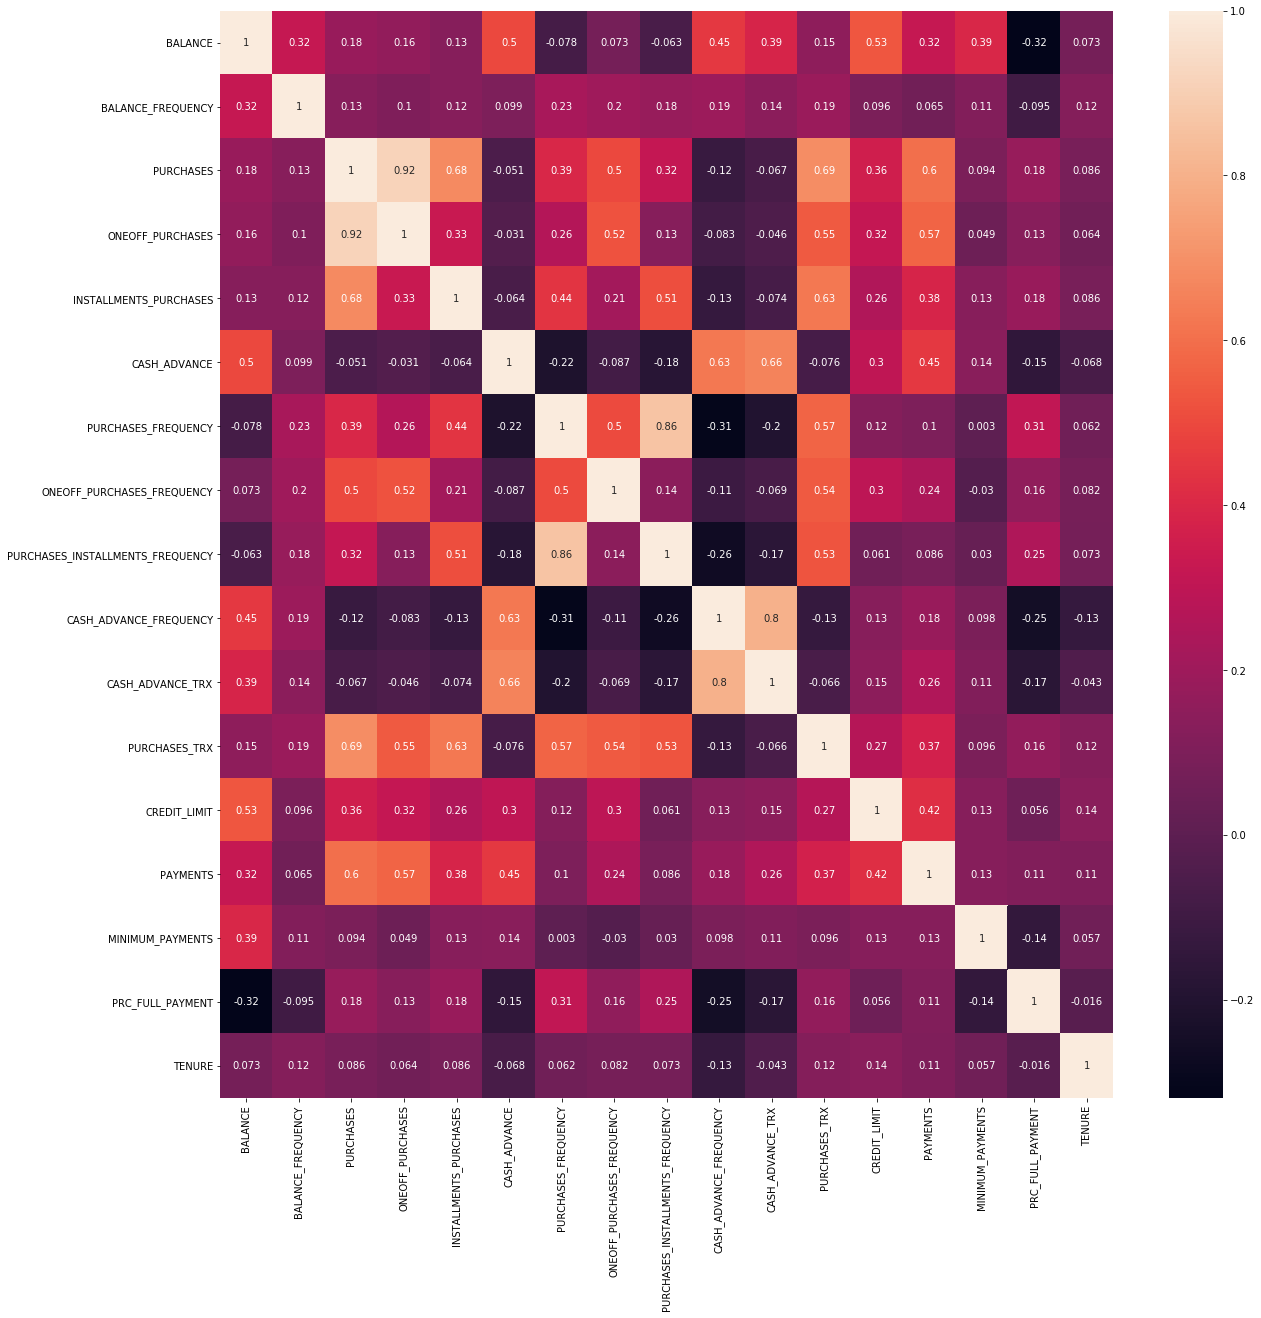

In [84]:
# plot the correlation matrix
corr_df = cust_df.corr()
plt.subplots(figsize = (15, 15))
sns.heatmap(corr_df, annot = True)

# choose the features based on correlation

c:\program files (x86)\python37-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


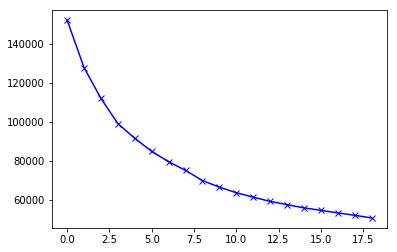

In [38]:
# scale the data
scaler = StandardScaler()
cust_df_scaled = scaler.fit_transform(cust_df.iloc[:,1:])

# elbow method for optimal number of clusters
wss = list()
for i in range(1, 20, 1):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(cust_df_scaled)
    wss.append(kmeans.inertia_)
plt.plot(wss, 'bx-')


In [39]:
# fit the optimal model
kmeans = KMeans(7)
kmeans.fit(cust_df_scaled)
kmeans.cluster_centers_.shape

(7, 17)

In [40]:

clust_centers = pd.DataFrame(data = scaler.inverse_transform(kmeans.cluster_centers_), columns = list(cust_df.columns[1:]))
clust_centers

# First Customer cluster-2 (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, cluster with lowest balance and cash advance , and percentage of full payment
# Second customer cluster-3 (Revolvers): Those who use credit card as a loan (most lucrative sector): highest balance and cash advance , low purchase frequency, high cash advance transactions and low percentage of full payment
# Third customer cluster-5 (Prime): High credit limit and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster-6 (low tenure): These are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1853.269837,0.979191,3033.776719,2087.275153,946.973635,336.858787,0.929427,0.759268,0.578637,0.053551,1.079465,44.769473,7076.260639,2879.252259,789.142890,0.287555,11.929190
1,1604.153753,0.972651,264.141483,216.344023,47.971346,788.700656,0.161631,0.101115,0.062514,0.155924,3.061138,3.083626,3424.496369,1031.786855,833.198559,0.021386,11.880183
2,103.391285,0.372764,347.429370,209.911679,137.766893,300.348988,0.270996,0.075058,0.188988,0.030534,0.675063,4.363560,3865.272413,1146.496499,263.446205,0.240110,11.785055
3,5104.620846,0.970807,595.013868,352.888487,242.242783,5225.801549,0.314147,0.148763,0.210259,0.520711,16.596998,9.107390,8242.153055,4214.010777,2275.982940,0.039416,11.605081
4,794.198498,0.956116,912.109599,207.195682,705.345870,204.508964,0.880214,0.098072,0.825762,0.039367,0.767408,18.845261,3482.166442,1080.695960,792.189204,0.240669,11.855416
5,4425.362379,0.974886,16338.028250,11188.905375,5149.122875,1012.529590,0.924792,0.774489,0.774489,0.077083,2.512500,133.687500,12430.000000,16098.700812,2516.595215,0.406617,11.962500
6,861.385360,0.794488,395.941226,245.976624,150.442309,1116.114939,0.411243,0.121337,0.273164,0.195605,3.229299,5.133758,2465.787340,602.000784,375.834865,0.157738,7.240446


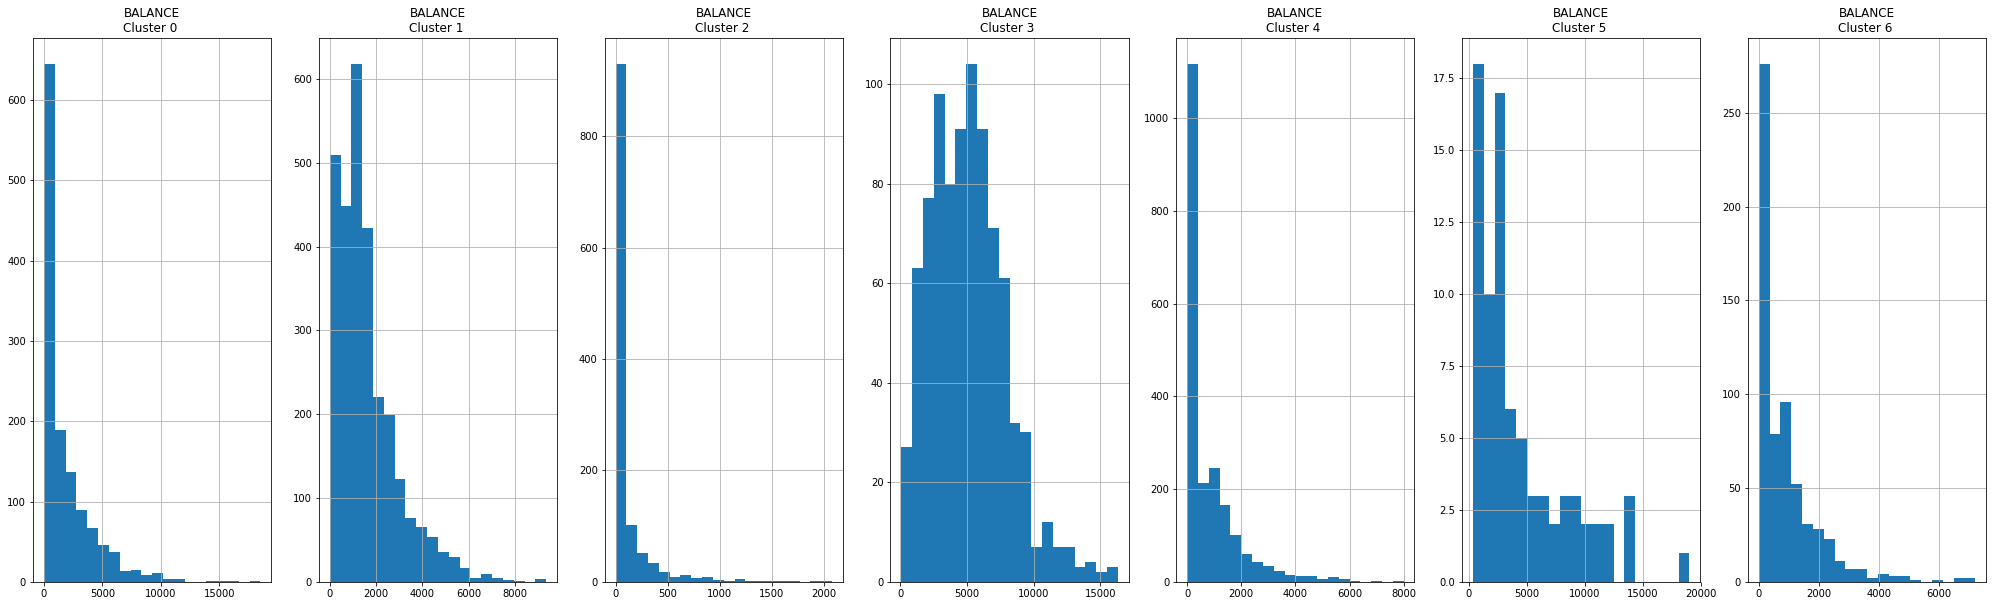

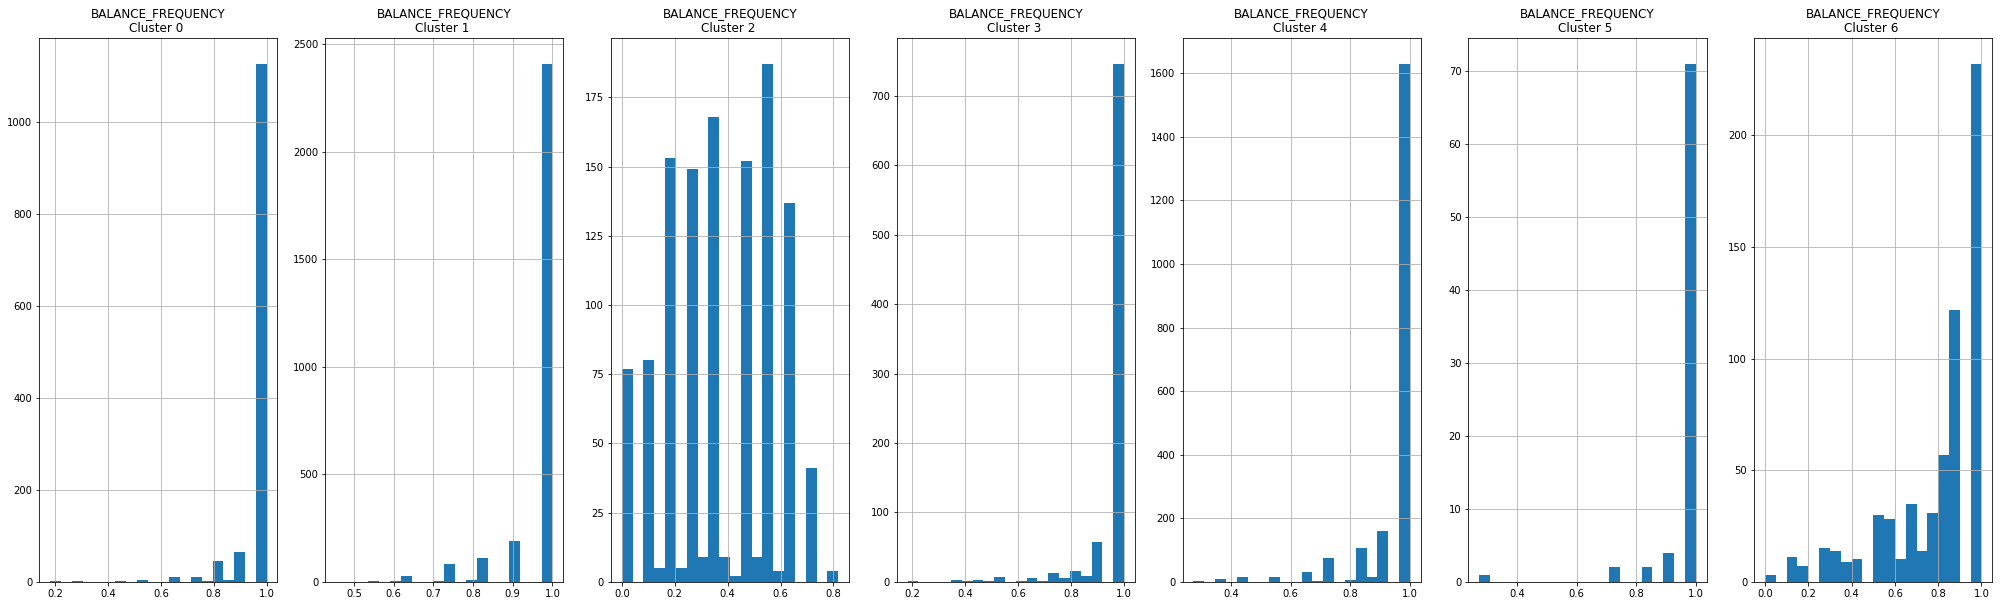

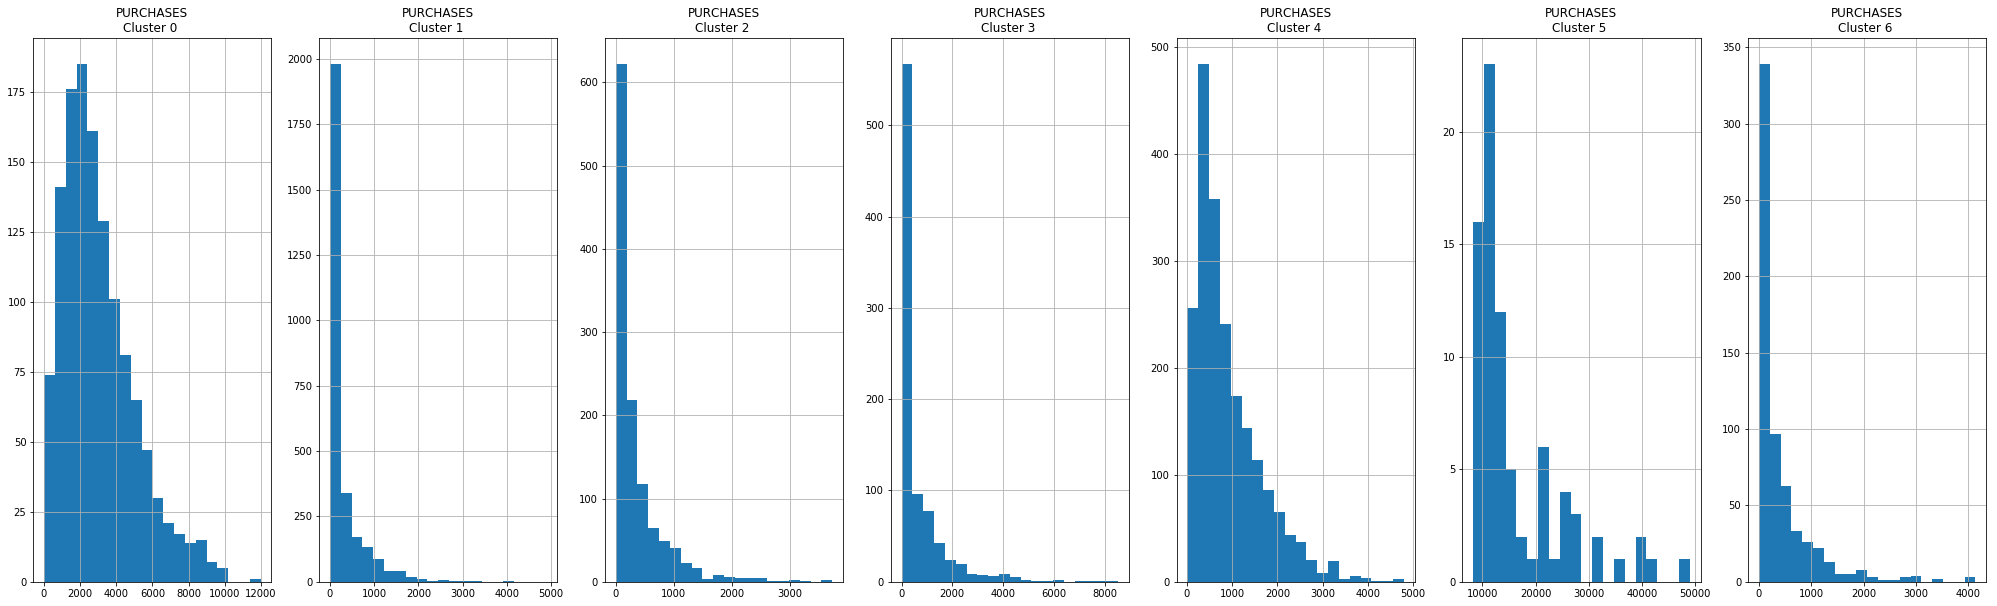

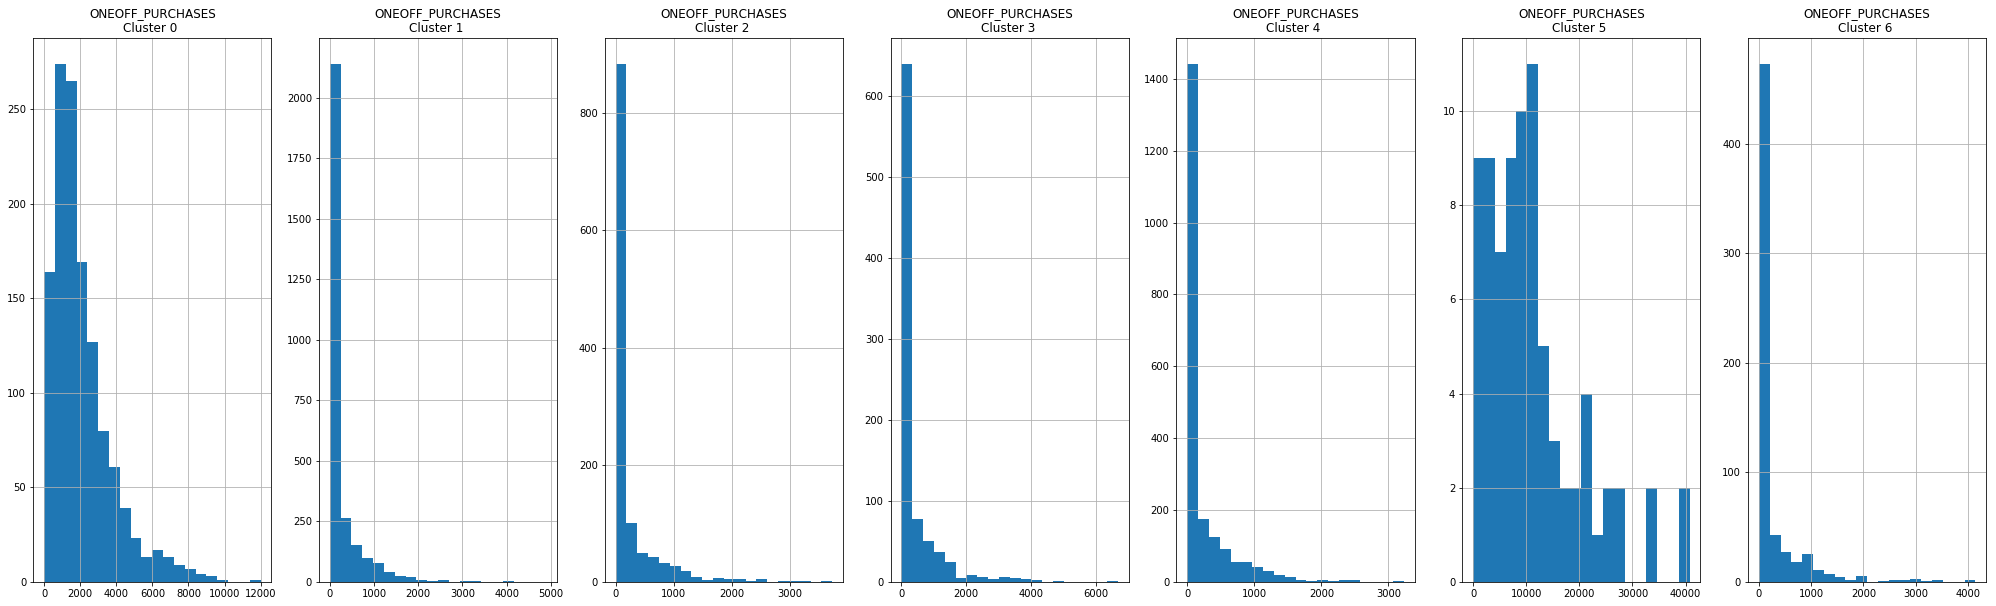

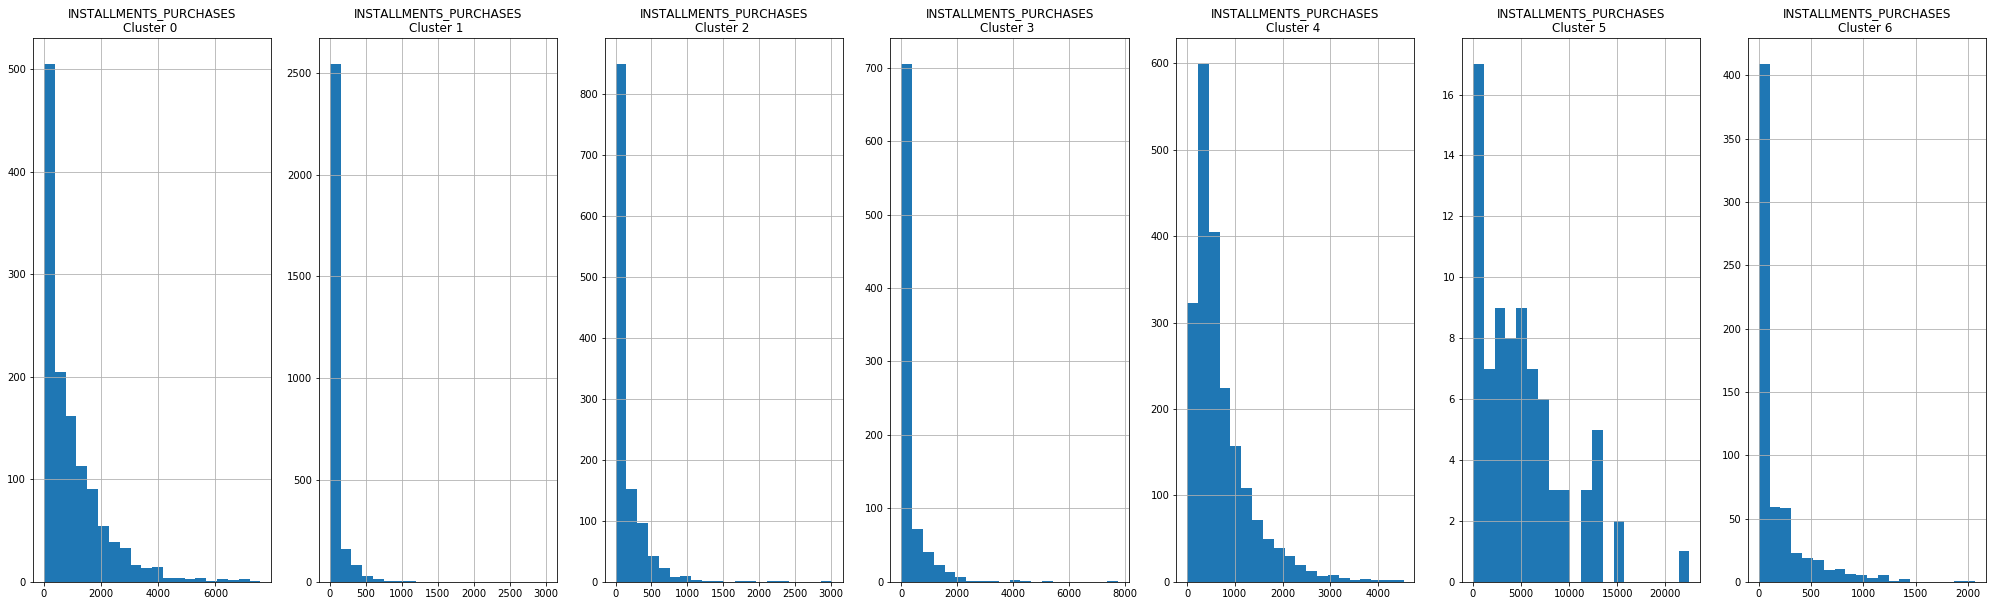

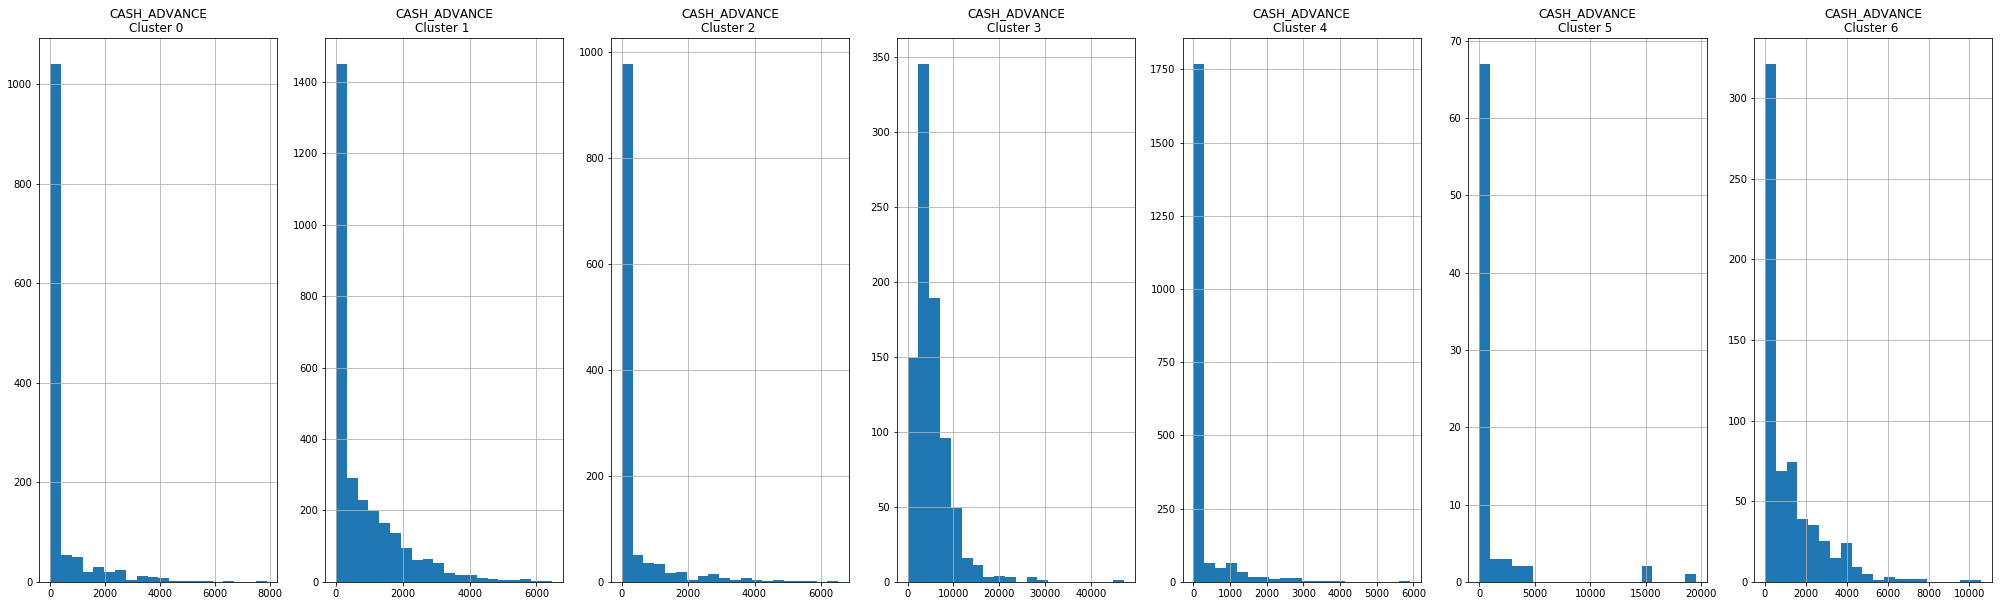

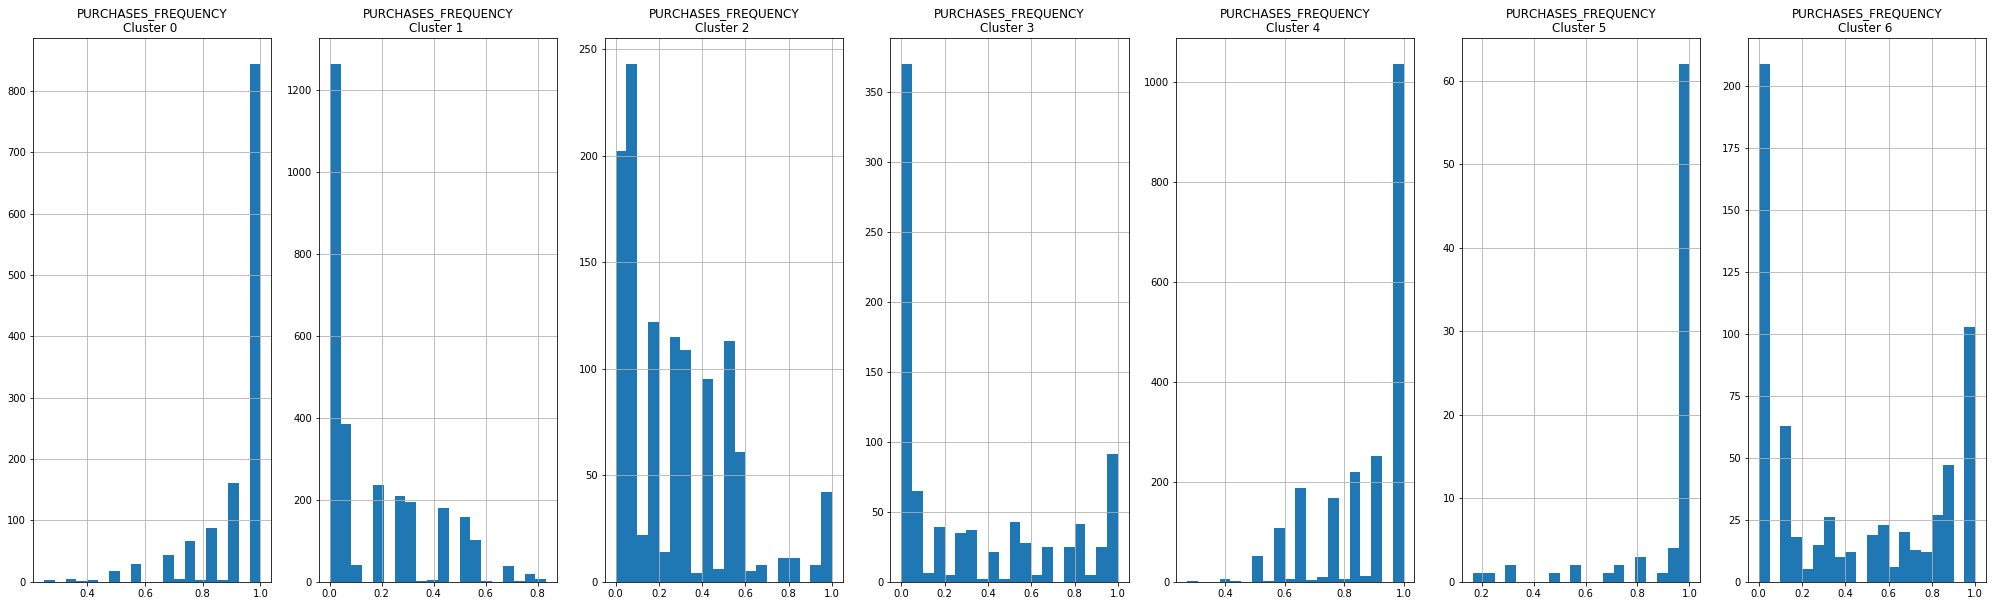

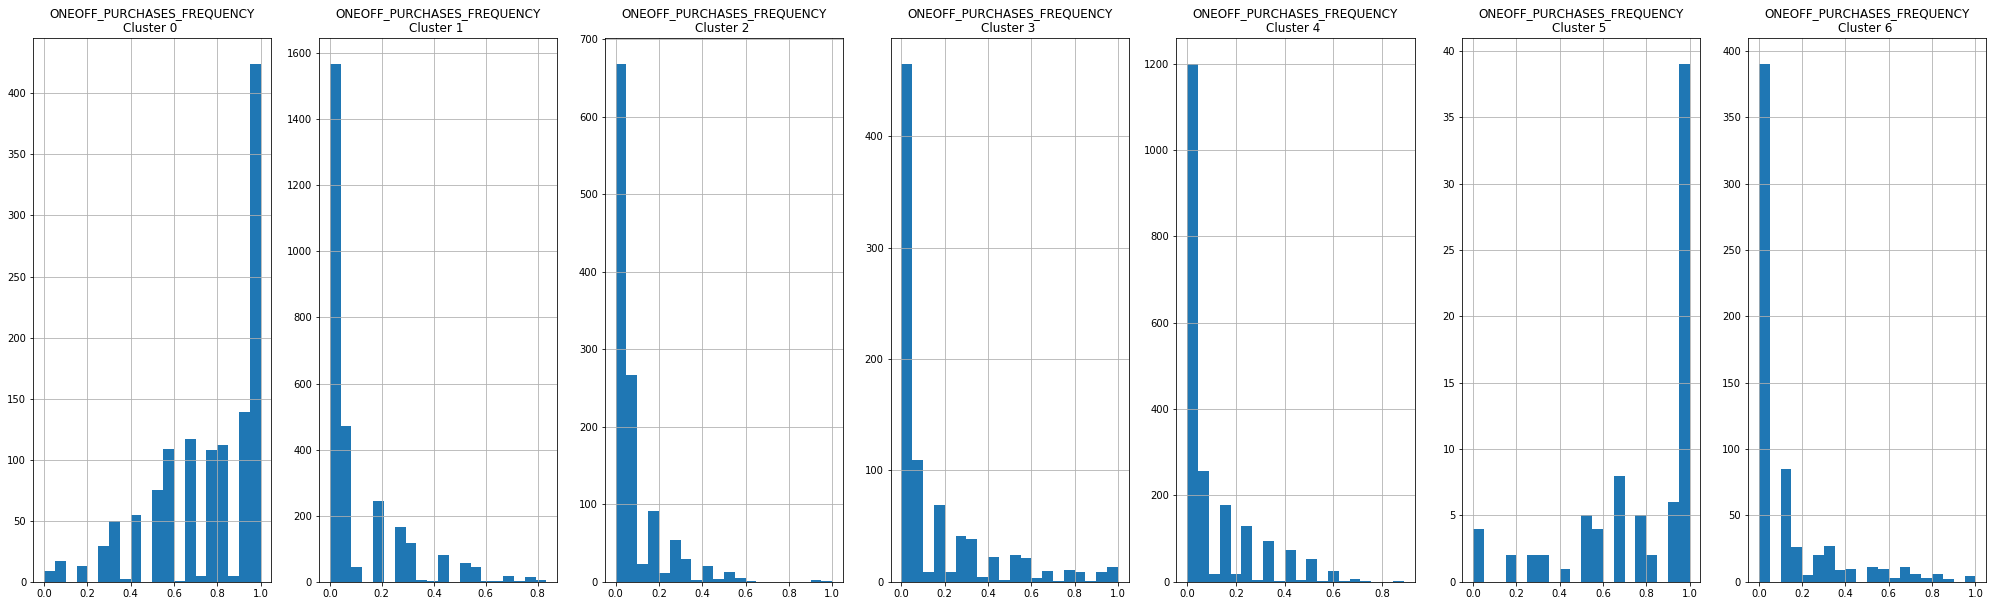

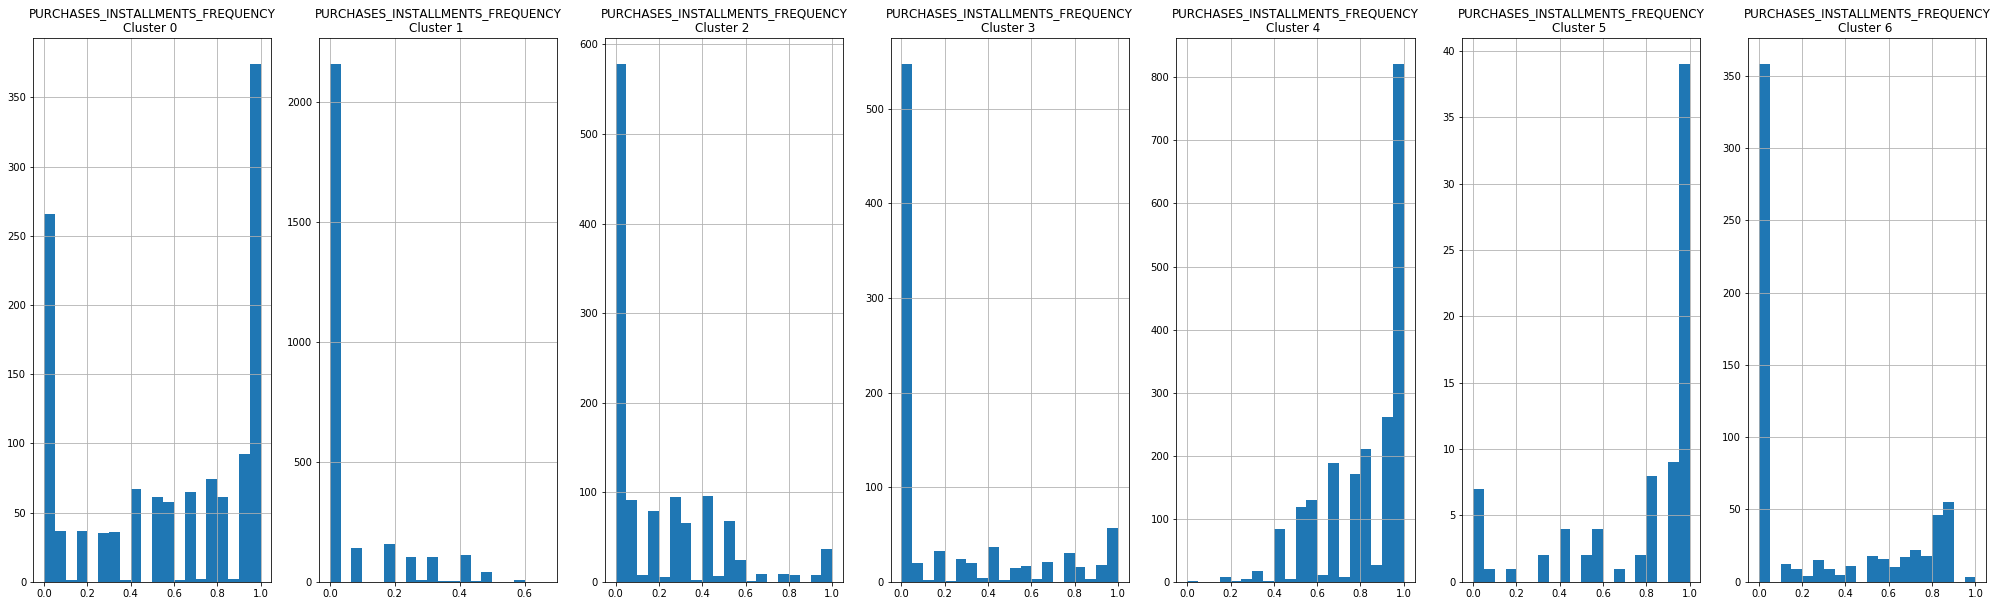

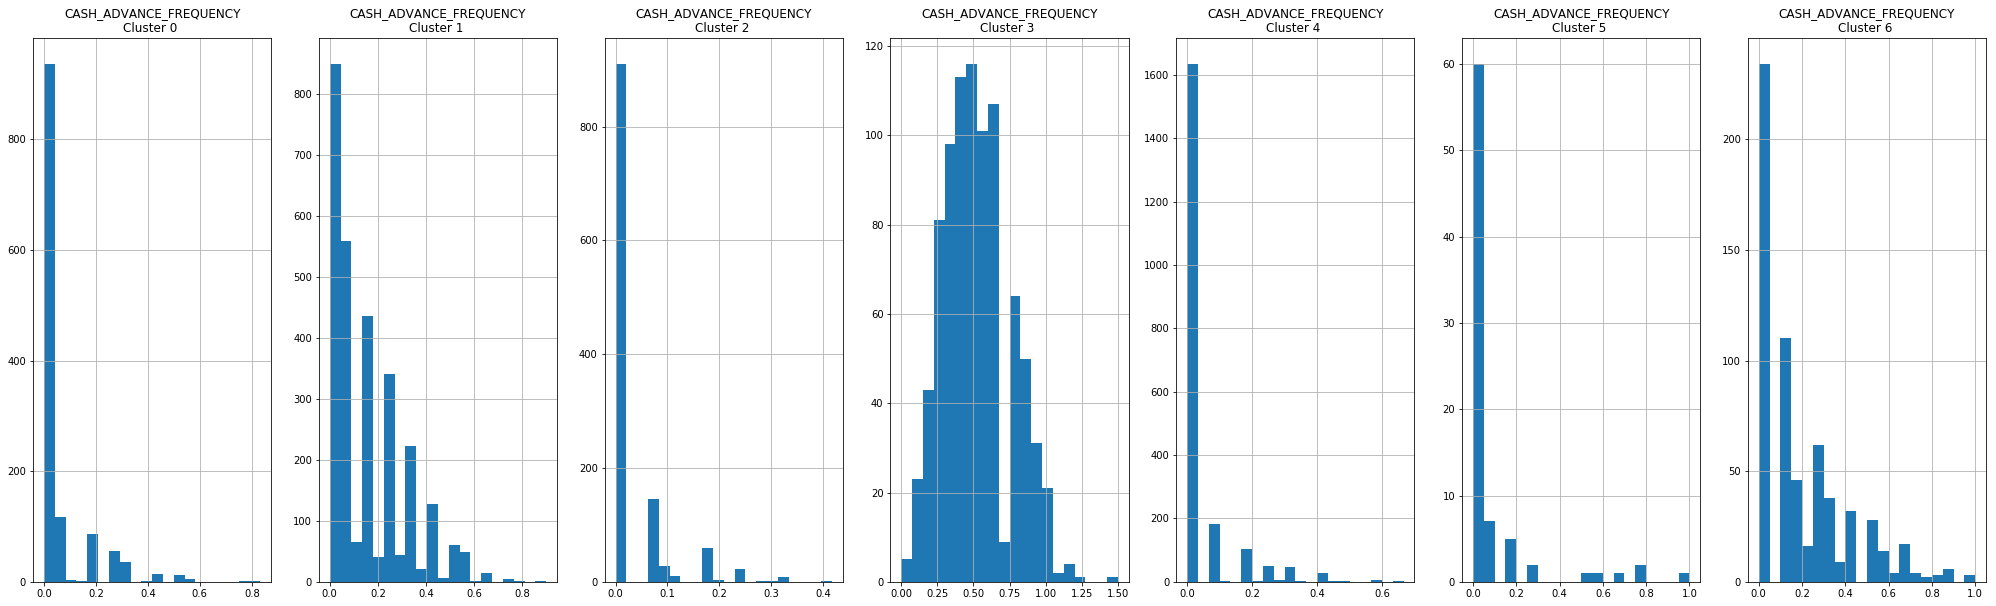

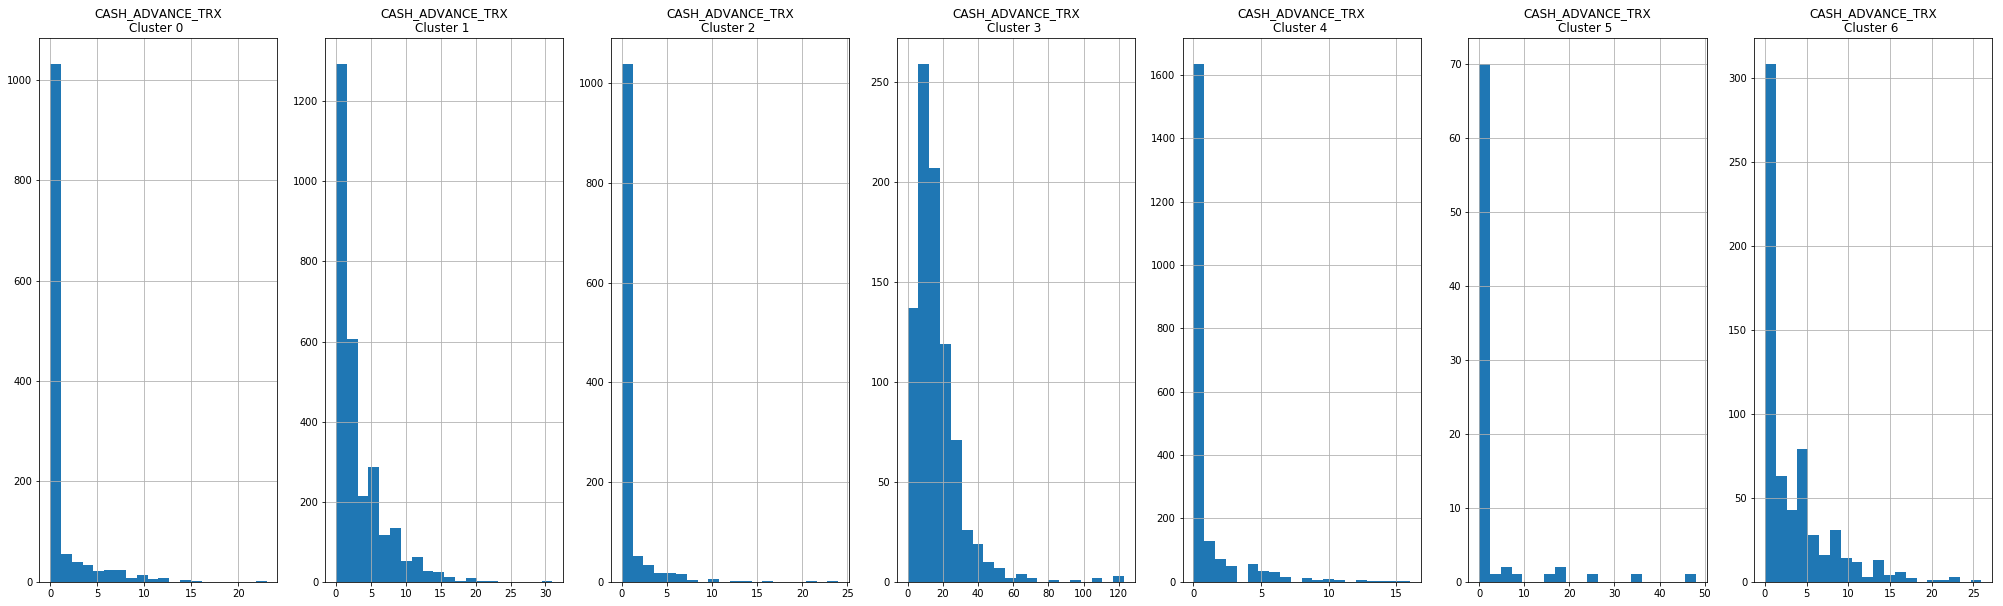

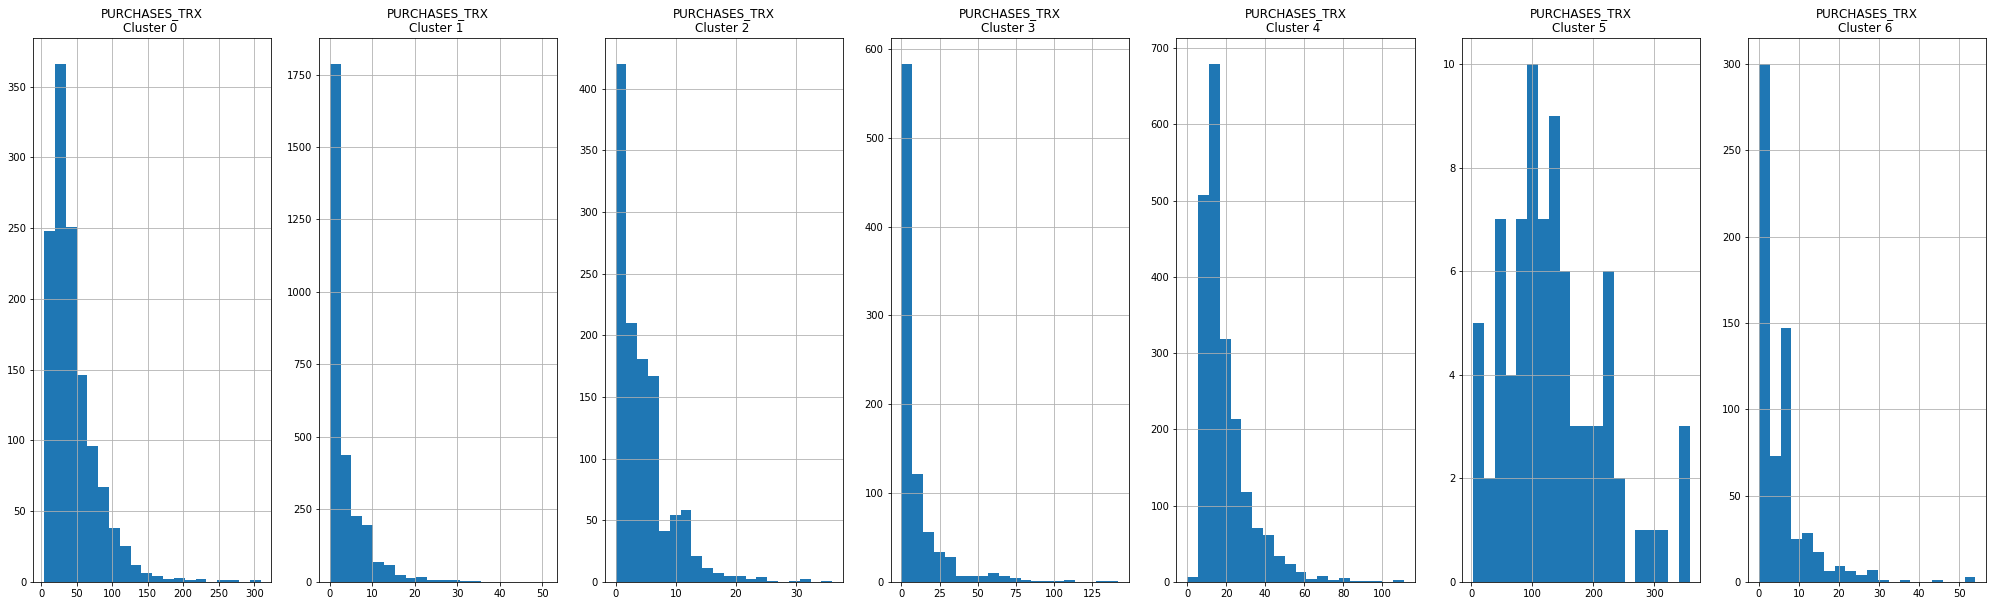

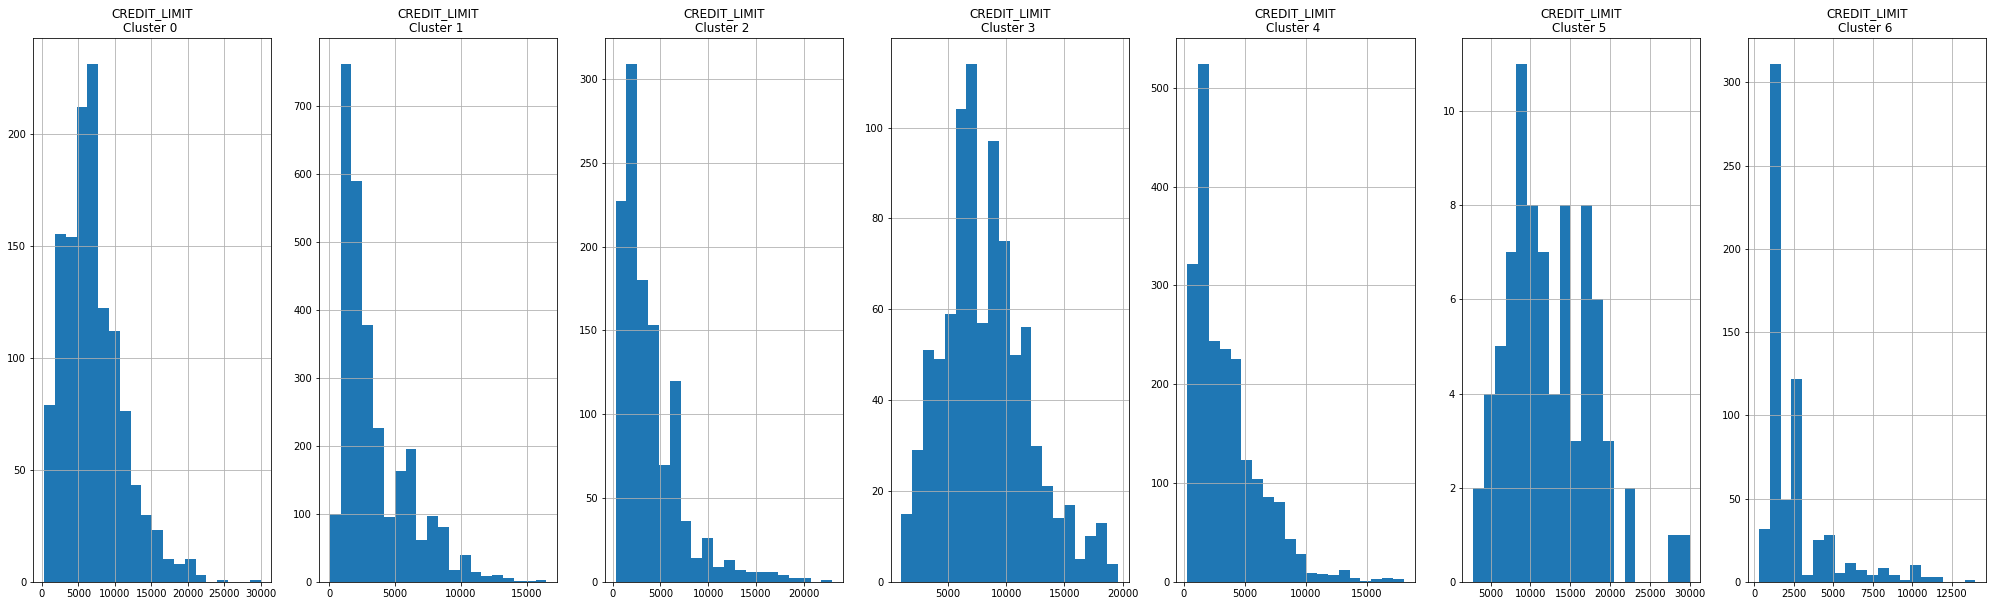

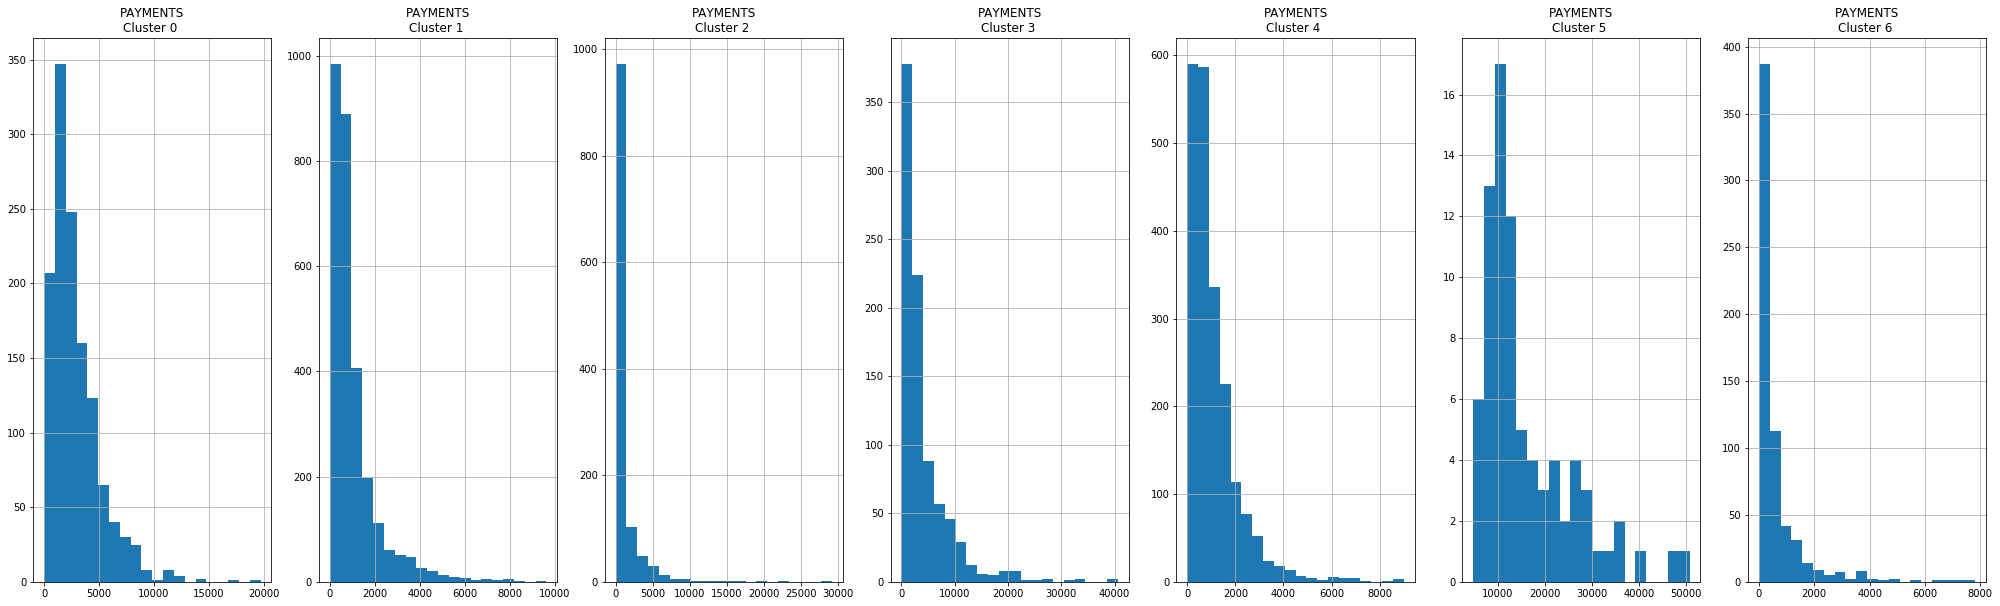

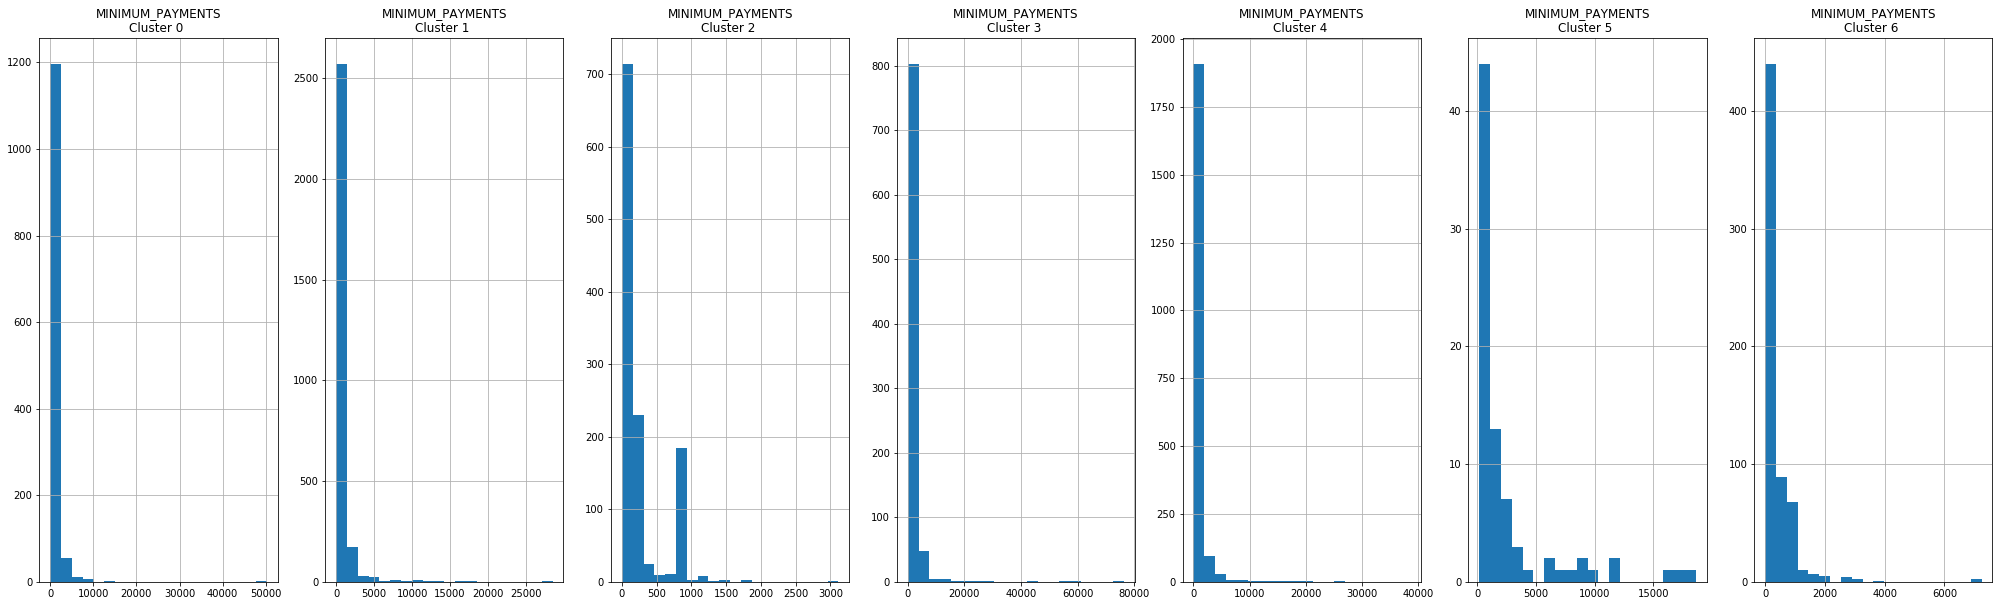

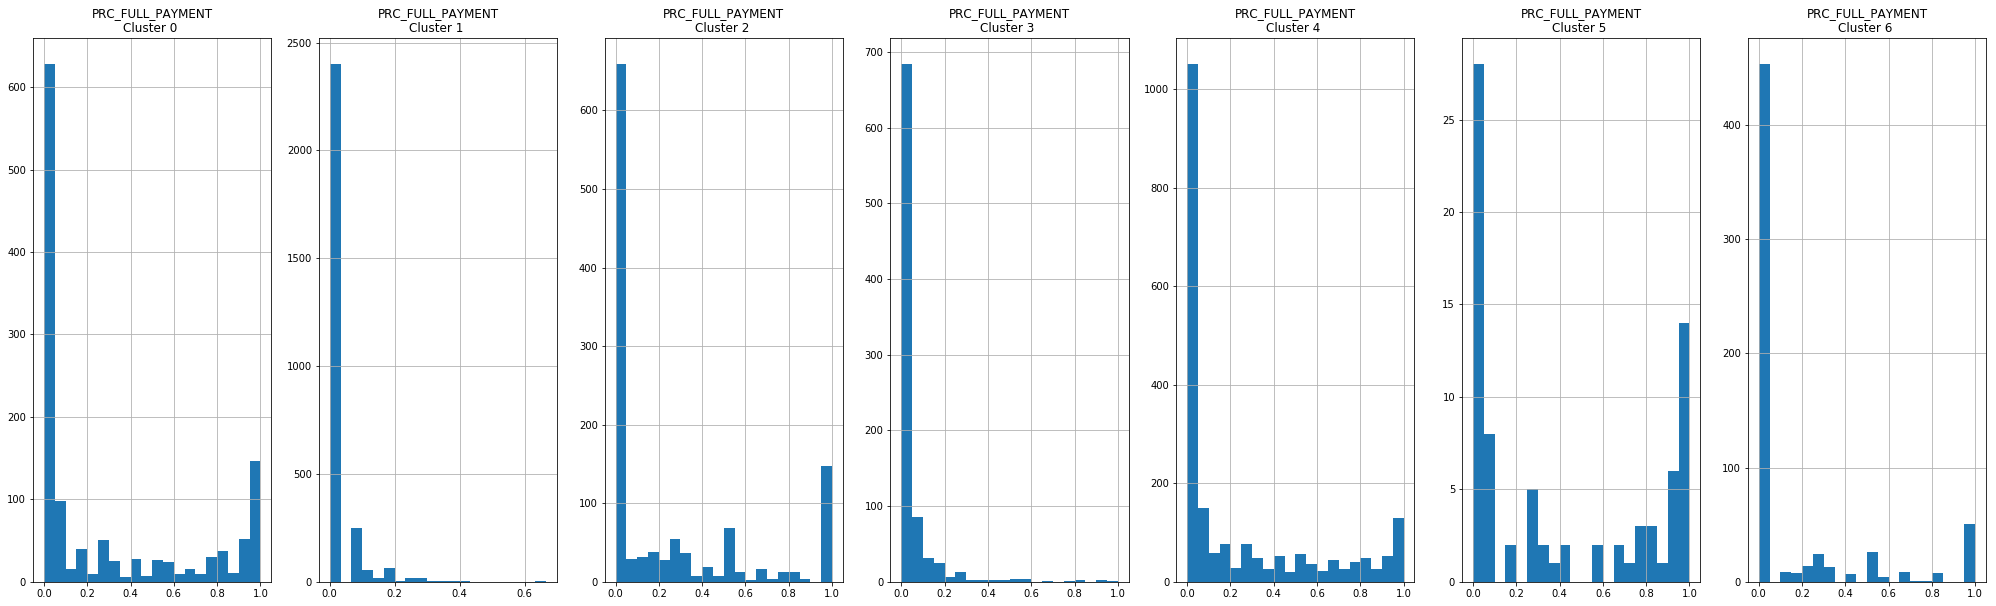

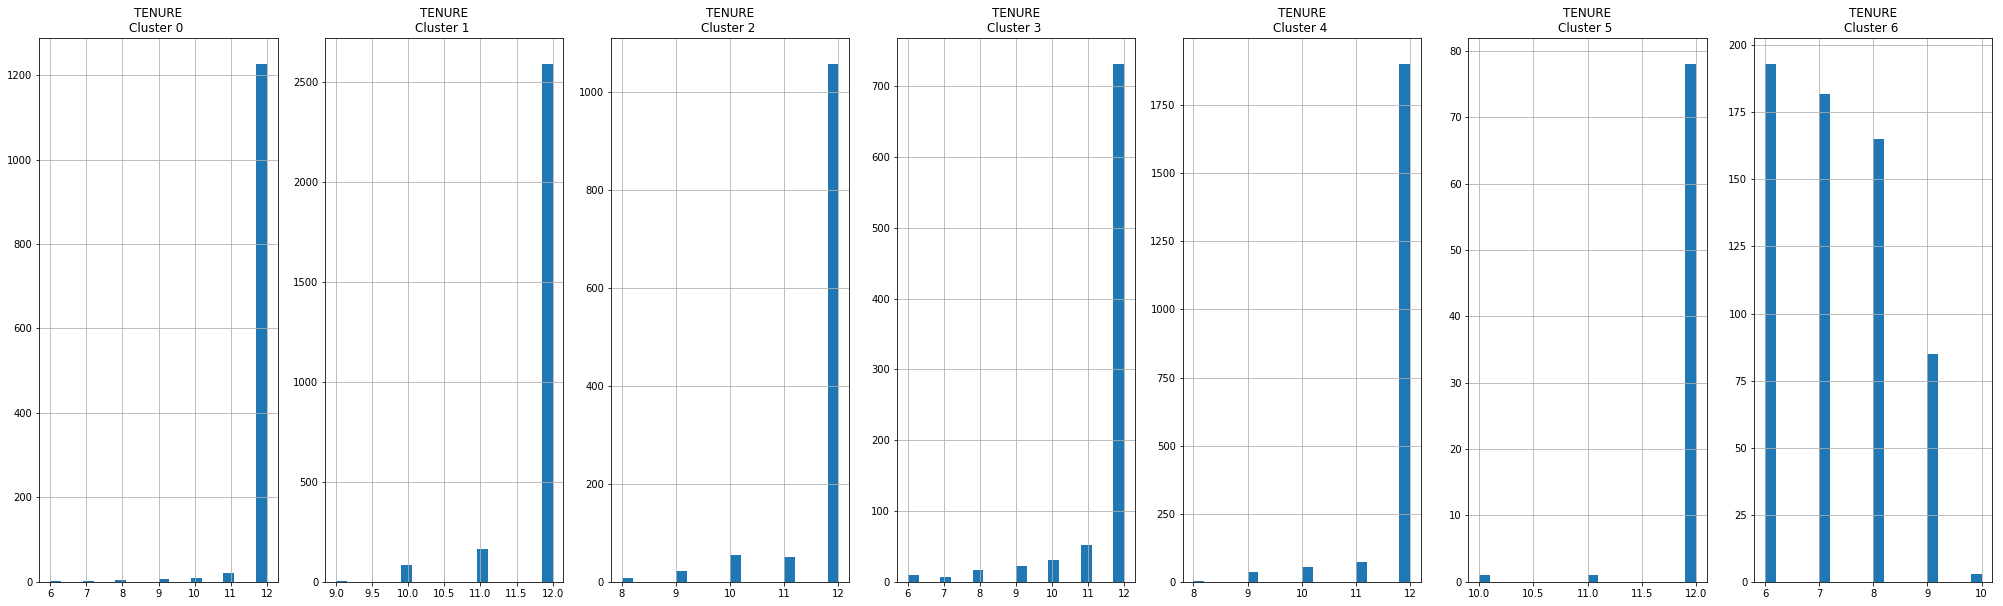

In [41]:
# get the labels and concat them with the original dataframe
cust_df_clust = pd.concat([cust_df, pd.DataFrame({'cluster' : kmeans.labels_})], axis = 1)
# plot the histogram of various clusters
for i in cust_df.columns[1:]:
  plt.figure(figsize = (35, 10))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = cust_df_clust[cust_df_clust['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}\nCluster {} '.format(i,j))
  plt.show()

In [42]:
# perform principal component analysis
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(cust_df_scaled)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pc1', 'pc2'])
pca_df_clust = pd.concat([pca_df, pd.DataFrame({'cluster' : kmeans.labels_})], axis = 1)
pca_df_clust.head()

,pc1,pc2,cluster
0,-1.682221,-1.076450,1
1,-1.138295,2.506477,3
2,0.969687,-0.383508,0
3,-0.873628,0.043170,1
4,-1.599435,-0.688581,1


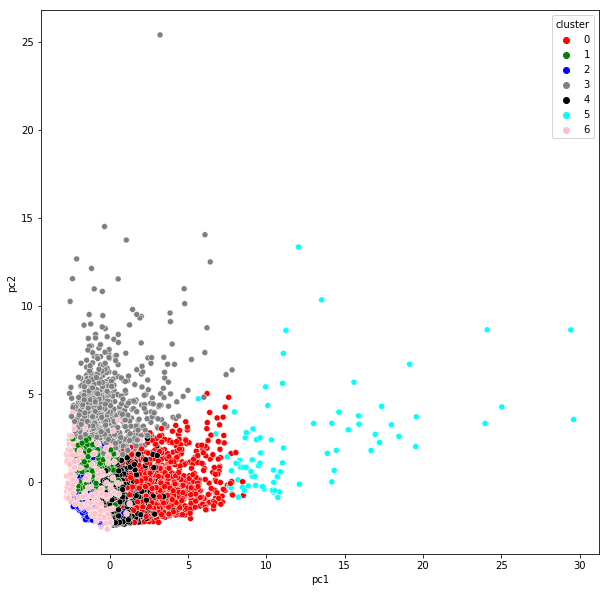

In [47]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = "pc1", y = "pc2", hue = "cluster", data = pca_df_clust, palette =['red','green','blue','grey','black','cyan','pink'])
plt.show()